In [1]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman.sigma_points import MerweScaledSigmaPoints
from filterpy.common.discretization import Q_discrete_white_noise
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # red   with alpha = 30%
})

In [48]:
b, m, c, d = .25, 1, .1, 1
def fx(x, dt):
    # print(x)
    return x - b*(x - 1) * (x + c)
def hx(x):
    return x

In [49]:
points = MerweScaledSigmaPoints(1, alpha=.1, beta=2., kappa=0)

In [50]:
points

MerweScaledSigmaPoints object
n = 1
alpha = 0.1
beta = 2.0
kappa = 0
Wm = [-99.  50.  50.]
Wc = [-96.01  50.    50.  ]
subtract = <ufunc 'subtract'>
sqrt = <function cholesky at 0x00000157C12F61F0>

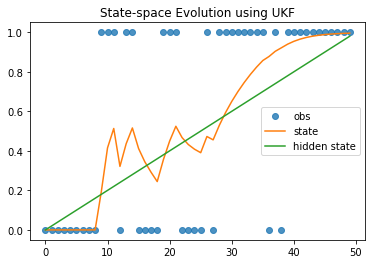

In [68]:
kf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=.1, fx=fx, hx=hx, points=points)
steps = 50
z = np.array([0])
states = np.empty((steps,))
zs = np.zeros((steps,))
kf.Q = np.array([.001])

map = lambda x : 2*(3*x / (3*x+1))
zs = map(np.linspace(0, 1, steps))
kf.R = np.array([2])
zs += np.random.normal(0, .1, size=(steps,))
zs = np.where(zs > 1, 1, zs)

important = lambda x : -400/121*(x-1) * (x+.1)

test_obs = np.empty((steps,))
for i in range(steps):
    test_obs[i] = np.random.binomial(1, i/steps)

for i in range(len(test_obs)):
    kf.predict()
    # print(kf.x)
    # print(kf.z)
    kf.update(test_obs[i])
    states[i] = kf.x

states = np.where(states < 0, 0, states)
plt.plot(range(steps), test_obs, 'o', label='obs', alpha=.8)
plt.plot(range(steps), states, label='state')
plt.plot(range(steps), np.array([i for i in range(steps)]) / steps, label='hidden state')
plt.legend()
plt.title('State-space Evolution using UKF')
plt.savefig('ukf_plot', dpi=500)
plt.show()
# print(np.argwhere(states >= 1))
# plt.plot(range(steps), states)